In [66]:
import pandas as pd
from pathlib import Path

# I dati sono stati ottenuti da Binance, maggior exchange di Crypto (?)
ticker = "SOL"
cryptolist = ["ETH","SOL","XRP","BTC"]

In [82]:
data_folder = Path("rawdata")
filepath = data_folder / f"Binance_{ticker}EUR_d.csv"
df = pd.read_csv(f"rawdata/Binance_{ticker}EUR_d.csv").convert_dtypes()
df = df.reset_index(drop=False)

nomi = {
    "level_0" : "Unix",
    "level_1" : "Date",
    "level_2" : "Symbol",
    "level_3" : "Open",
    "level_4" : "High",
    "level_5" : "Low",
    "level_6" : "Close",
    "level_7" : f"Volume {ticker}",
    "level_8": "Volume EUR",
    "https://www.CryptoDataDownload.com" : "trade count"
    
}
df.rename(columns=nomi,inplace=True)
df = df.drop(0)

df["Unix"] = df["Unix"].astype(int)
df['Date'] = pd.to_datetime(df['Date'])
df["Open"] = df["Open"].astype(float)
df["High"] = df["High"].astype(float)
df["Low"] = df["Low"].astype(float)
df["Close"] = df["Close"].astype(float)
df[f"Volume {ticker}"] = df[f"Volume {ticker}"].astype(float)
df["Volume EUR"] = df["Volume EUR"].astype(float)
df["trade count"] = df["trade count"].astype(int)

df.drop_duplicates(inplace=True)
df.to_csv(f"{ticker}EUR.csv",index=False)


In [84]:
import pandas as pd
import plotly.express as px

for x in cryptolist:
    raw = pd.read_csv(f"{x}EUR.csv",parse_dates=True).convert_dtypes()
    close = raw.loc[:,["Date","Close"]]
    
    fig = px.line(close,x="Date",y="Close",title=f"{x} Closing price")
    fig.show()
    
    dailyret = close.set_index("Date")
    dailyret = dailyret.pct_change(1) * 100
    
    fig2= px.area(dailyret,title=f"{x} Daily returns")
    fig2.show()
    
    



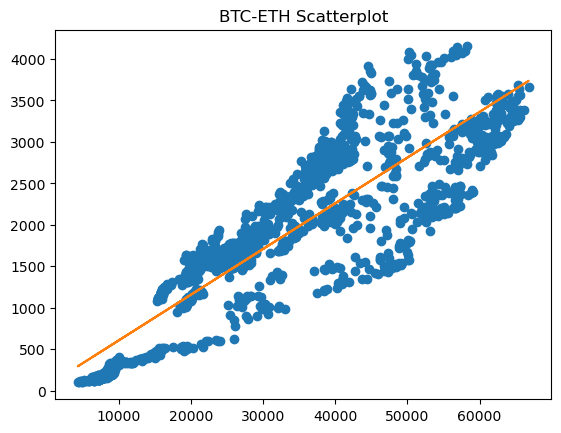

BTC-ETH R^2 = 0.7911872713185826


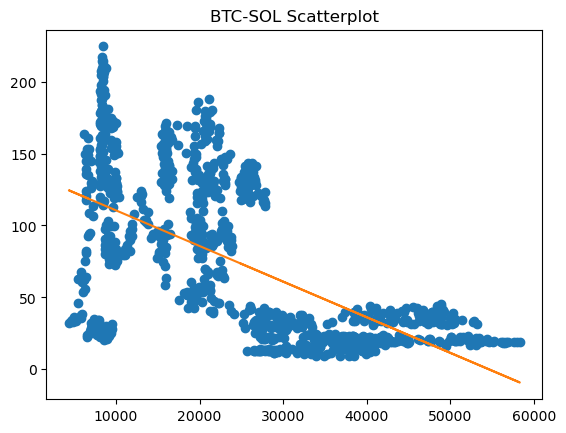

BTC-SOL R^2 = 0.37811825227641993


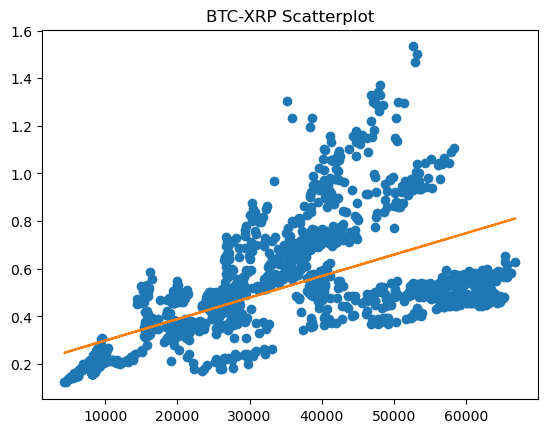

BTC-XRP R^2 = 0.4010113048443332


In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


for crypto2 in cryptolist:
    crypto1 = "BTC"
    
    raw1 = pd.read_csv(f"{crypto1}EUR.csv",parse_dates=True).convert_dtypes()
    raw2 = pd.read_csv(f"{crypto2}EUR.csv",parse_dates=True).convert_dtypes()
    
    if len(raw1) < len(raw2):
        raw2 = raw2.drop(range(0,len(raw2)-len(raw1)))
    else:
        if len(raw1) > len(raw2):
            raw1 = raw1.drop(range(0, len(raw1) - len(raw2)))
        
    close1 = raw1.loc[:,"Close"]
    close2 = raw2.loc[:,"Close"]
    
    plt.plot(close1,close2,"o")
    
    x = close1.to_numpy().reshape((-1,1))
    y = close2.to_numpy()
    
    model = LinearRegression().fit(x,y)
    m = model.coef_
    b = model.intercept_
    plt.plot(close1,m*close1 + b)
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    #plt.text(500, 3800, f"R^2={model.score(x,y)}", fontsize=10, verticalalignment='top', bbox=props)
    plt.title(f"{crypto1}-{crypto2} Scatterplot")
    plt.show()
    print(f"{crypto1}-{crypto2} R^2 = {model.score(x,y)}")


In [95]:
import statsmodels

for x in cryptolist:
    
    raw = pd.read_csv(f"{x}EUR.csv",parse_dates=True).convert_dtypes()
    close = raw.loc[:,["Date","Close"]]
    
    monthly = close.set_index("Date")
    yearly = close.set_index("Date")
    monthly = monthly.pct_change(30) * 100
    yearly = yearly.pct_change(365) * 100
    
    print(f"Monthly stats for {x}: \n {monthly.describe()}")
    print(f"Yearly stats for {x}: \n {yearly.describe()}")
    
    fig1 = px.histogram(monthly,title=f"Monthly Return distribution for {x} ")
    fig2 = px.histogram(yearly,title=f"Yearly Return distribution for {x} ")
    fig1.show()
    fig2.show()
    


Monthly stats for ETH: 
             Close
count      1714.0
mean    -1.718264
std     25.297356
min     -56.22858
25%    -17.485736
50%     -3.433556
75%      9.694456
max    144.988954
Yearly stats for ETH: 
             Close
count      1379.0
mean    -13.29539
std     77.344935
min    -94.964515
25%    -83.640577
50%    -37.606872
75%     23.331935
max    270.196575


Monthly stats for SOL: 
             Close
count      1203.0
mean     3.200359
std     38.900548
min    -79.577335
25%    -20.224147
50%      0.607349
75%     19.101801
max    181.624905
Yearly stats for SOL: 
              Close
count        868.0
mean    153.889699
std      362.92555
min     -90.681363
25%     -83.571143
50%      12.419325
75%     279.693952
max    1671.948052


Monthly stats for XRP: 
             Close
count      1714.0
mean     2.760296
std     30.906725
min    -76.093606
25%     -13.55779
50%      0.801291
75%     14.474409
max    223.705516
Yearly stats for XRP: 
             Close
count      1379.0
mean     2.973288
std     72.172624
min    -88.780548
25%    -44.855815
50%     -19.46461
75%     50.394175
max    262.973223


Monthly stats for BTC: 
             Close
count      1714.0
mean    -1.594399
std     19.548202
min    -53.366397
25%    -15.198926
50%     -2.391335
75%      7.469272
max    115.243509
Yearly stats for BTC: 
             Close
count      1379.0
mean   -10.791343
std     73.612916
min    -90.897978
25%    -65.677175
50%    -45.393194
75%     31.003079
max    263.063032


C:\Users\loren\AppData\Local\Temp\ipykernel_14412\969392951.py:40: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\loren\AppData\Local\Temp\ipykernel_14412\969392951.py:40: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\loren\AppData\Local\Temp\ipykernel_14412\969392951.py:40: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

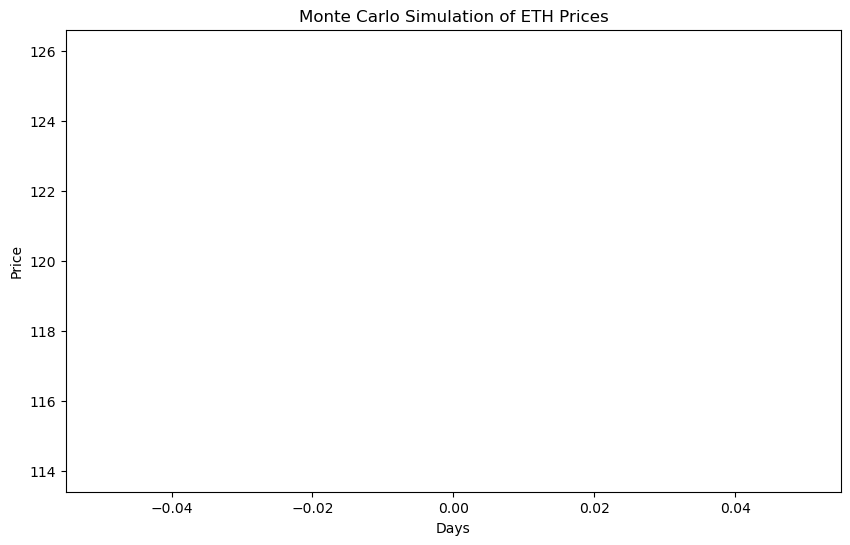

C:\Users\loren\AppData\Local\Temp\ipykernel_14412\969392951.py:40: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\loren\AppData\Local\Temp\ipykernel_14412\969392951.py:40: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\loren\AppData\Local\Temp\ipykernel_14412\969392951.py:40: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

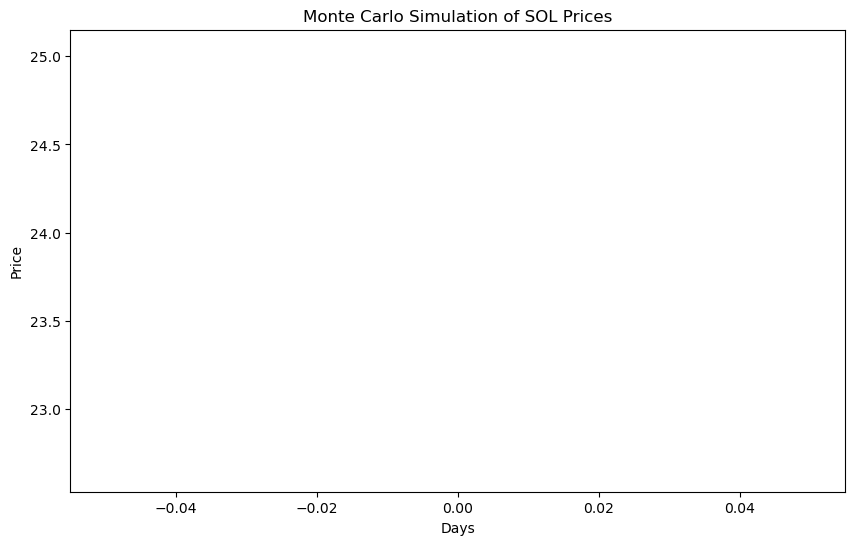

C:\Users\loren\AppData\Local\Temp\ipykernel_14412\969392951.py:40: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\loren\AppData\Local\Temp\ipykernel_14412\969392951.py:40: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\loren\AppData\Local\Temp\ipykernel_14412\969392951.py:40: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

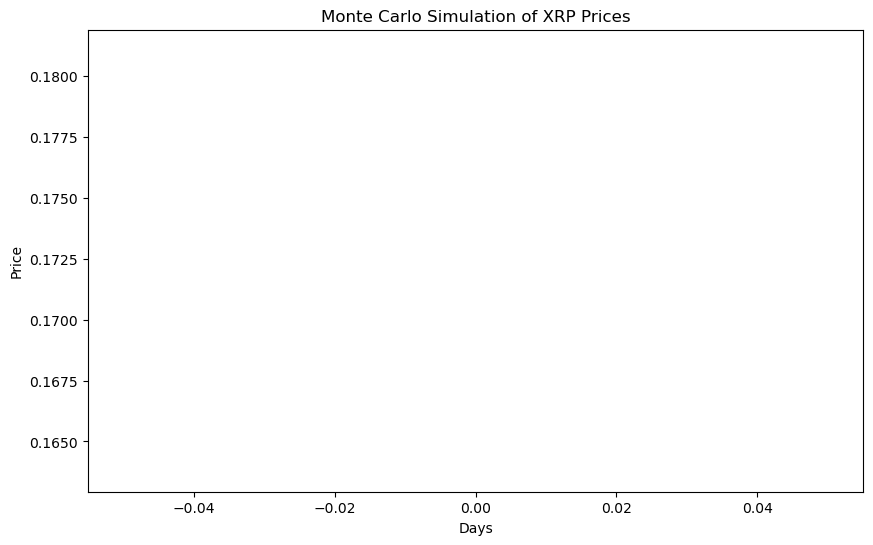

C:\Users\loren\AppData\Local\Temp\ipykernel_14412\969392951.py:40: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\loren\AppData\Local\Temp\ipykernel_14412\969392951.py:40: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\loren\AppData\Local\Temp\ipykernel_14412\969392951.py:40: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

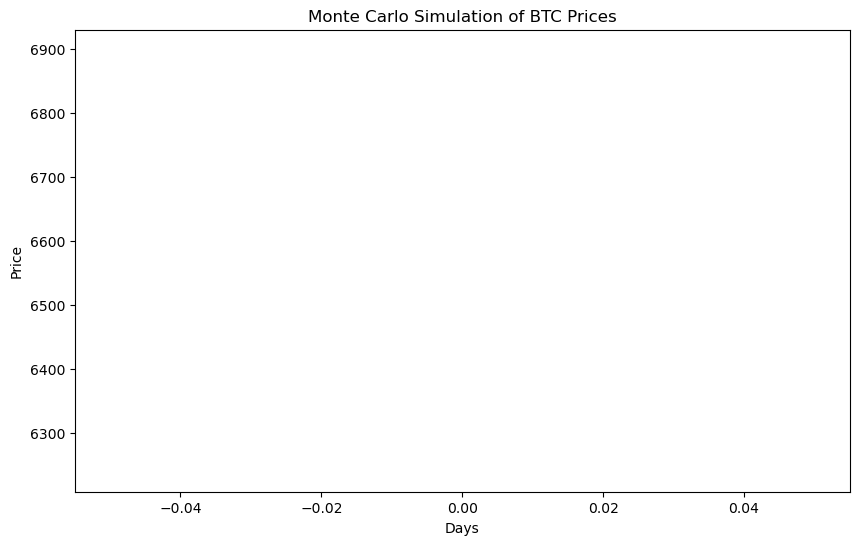

In [113]:
meanreturns = []
stddevs = []

num_simulations = 1000
num_days = 365

for x in cryptolist:
    raw = pd.read_csv(f"{x}EUR.csv",parse_dates=True).convert_dtypes()
    close = raw.loc[:,["Date","Close"]]
    dailyret = close.set_index("Date")
    dailyret = dailyret.pct_change(1) * 100
    #meanreturns.append(np.mean(dailyret))
    #stddevs.append(np.std(dailyret))
    
    #close
    #print(meanreturns)
    #print(stddevs)

    simulation_df = pd.DataFrame()

    if isinstance(close, pd.DataFrame):
        last_price = close['Close'].iloc[-1]  # Replace 'price_column' with the actual column name for price
    else:
        last_price = close.iloc[-1]  # If it's a Series
    
    last_price = float(last_price)  # Convert to float to avoid the Series issue
    
    # Calculate the mean and std of daily returns
    # Flatten the DataFrame or Series to calculate overall mean and std
    dailyret_mean = np.mean(dailyret.values)
    dailyret_std = np.std(dailyret.values)
    
    # Monte Carlo simulation
    for t in range(num_simulations):
        price_series = [last_price]  # Initialize with the last known price as a float
        for y in range(num_days):
            # Simulate the next day's price based on the previous day's price
            price = price_series[-1] * (1 + np.random.normal(dailyret_mean, dailyret_std))
            price_series.append(price)
        simulation_df[t] = price_series  # Store each simulation

    plt.figure(figsize=(10, 6))
    plt.plot(simulation_df)
    plt.title(f'Monte Carlo Simulation of {x} Prices')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.show()
        
    
        
        